In [1]:
# Loading libraries:

from datetime import datetime
import numpy as np
from numpy import random
import pandas as pd
from sklearn import linear_model
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import ensemble
from sklearn.model_selection import cross_val_score, KFold
import xgboost
import glob
import os

In [3]:
file_path = r'/Users/vince.dang/Desktop/SMU_MITB/CS610 Applied Machine Learning/Project/house_price'

new_data = pd.read_csv(file_path + '/complete_data.csv')

# Create dummy variables for categorical variables:
new_data['town'] = new_data['town'].astype('category')
new_data['flat_type'] = new_data['flat_type'].astype('category')
new_data['flat_model'] = new_data['flat_model'].astype('category')

new_data = pd.get_dummies(new_data, drop_first = True)

Training size: 493168
Test size: 123610
Test ratio = 0.20
R_squared of train =  0.9648818645455366
R_squared of test =  0.9627639101334132
MSE train =  882267416.5221438
MSE test =  890373967.1965431
RMSE train =  29702.98665996643
RMSE test =  29839.134826541856
 Test R squared by month=  [0.9628800942965782, 0.9582859735907889, 0.9629617516315732, 0.9646500710625039, 0.9637421902146136, 0.9531406116291024, 0.9657256961809908, 0.9642167437889518, 0.9713424054471477, 0.9585820615506803, 0.9621508804452767, 0.9714132870262473, 0.9665280126376008, 0.9647004969503159, 0.9674445339684077, 0.9609560417678762, 0.9667191318404373, 0.9646058472465908, 0.9569614919425888, 0.9665178809188094, 0.9667166606345168, 0.9620783820058294, 0.9659525054835447, 0.9614704166590905, 0.9623075172323099, 0.9598194716299284, 0.9596644263318028, 0.956206530574341, 0.9518380353664847, 0.9587636525912956, 0.9631445256842981, 0.9550507272186578, 0.9585174484002225, 0.963218576843787, 0.9556502700701176, 0.96201587

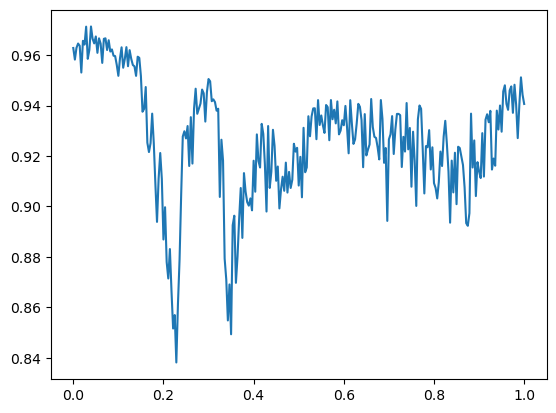

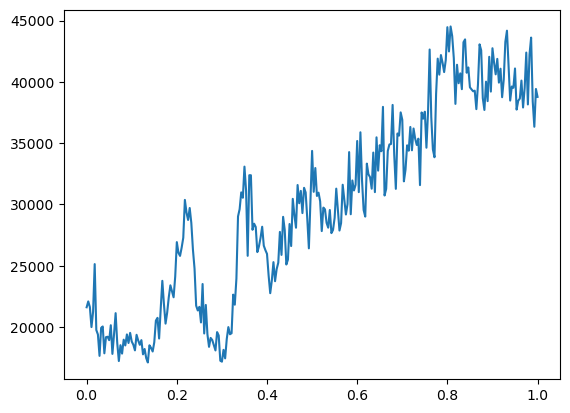

In [68]:
# Base model: Estimate current prices
# Split train and test set:
np.random.seed(2023) #Set seed for consistency
train = np.random.choice([True, False], new_data.shape[0], replace = True, p = [0.8, 0.2])

train_data = new_data[(train==True)]
test_data = new_data[(train==False)]

print('Training size:', len(train_data))
print('Test size:', len(test_data))
print('Test ratio = %.2f' % (len(test_data)/len(new_data)))
x_train = train_data[train_data.columns.difference(['resale_price'])]
y_train = train_data['resale_price']
x_test = test_data[test_data.columns.difference(['resale_price'])]
y_test = test_data['resale_price']

gb_model = ensemble.GradientBoostingRegressor(n_estimators = 500, random_state = 2023)   

# Fit model:
gb_model.fit(x_train, y_train)
y_train_pred = gb_model.predict(x_train)
y_test_pred = gb_model.predict(x_test)

print("R_squared of train = ", metrics.r2_score(y_train, y_train_pred))
print("R_squared of test = ", metrics.r2_score(y_test_pred, y_test))
print('MSE train = ', metrics.mean_squared_error(y_train, y_train_pred))
print('MSE test = ', metrics.mean_squared_error(y_test_pred, y_test))
print('RMSE train = ', (metrics.mean_squared_error(y_train, y_train_pred))**(0.5))
print('RMSE test = ', (metrics.mean_squared_error(y_test_pred, y_test))**(0.5))
month_list = x_test['month_count'].unique()
r_2_month = []
rmse_month = []

# Plotting:
for curr_month in month_list:
    y_test_pred_month = y_test_pred[x_test['month_count'] == curr_month]
    y_test_month = y_test[x_test['month_count'] == curr_month]
    r_2_test = metrics.r2_score(y_test_pred_month, y_test_month)
    rmse_test = (metrics.mean_squared_error(y_test_pred_month, y_test_month))**(0.5)
    r_2_month.append(r_2_test)
    rmse_month.append(rmse_test)

print(' Test R squared by month= ', r_2_month)

#Checking with plot:
fig = plt.figure()
plt.plot(month_list, r_2_month)
plt.show()
plt.plot(month_list, rmse_month)
plt.show() 

In [4]:
# Split train and test set:
# month_threshold = 221
month_threshold_list = [0.7892857142857143, 0.825, 0.8607142857142858, 0.8964285714285715, 0.9321428571428572, 0.9678571428571427]


Training size: 491724
Test size: 125054
Test ratio = 0.20
R_squared of train =  0.9656300991333417
R_squared of test =  0.6085552908917683
 Test R squared by month=  [0.9106414401164644, 0.9064828898806674, 0.8916067882726048, 0.9032245522317246, 0.8862455532131068, 0.8910799527882031, 0.8843220957575837, 0.8893739214831746, 0.8860993507923464, 0.8730314044059647, 0.8705494182299808, 0.8659006097165096, 0.8745706446700834, 0.8699376560806111, 0.864140391669032, 0.8581971050689623, 0.8651549173973163, 0.8583694551505505, 0.8614953277824655, 0.8576463917355308, 0.8458823660408052, 0.8474562442482463, 0.8401313450386322, 0.8282383157981582, 0.8446399071360828, 0.8124916789681635, 0.8118089647790825, 0.8472874372753639, 0.823255710049691, 0.8258090719526863, 0.82386011581365, 0.8281267497008826, 0.8342358143944317, 0.8340019800803341, 0.8205399477644024, 0.8150111757736803, 0.8059424228860297, 0.740137832911573, 0.7158612953025618, 0.6832254928642708, 0.6756237710835227, 0.599390470744009,

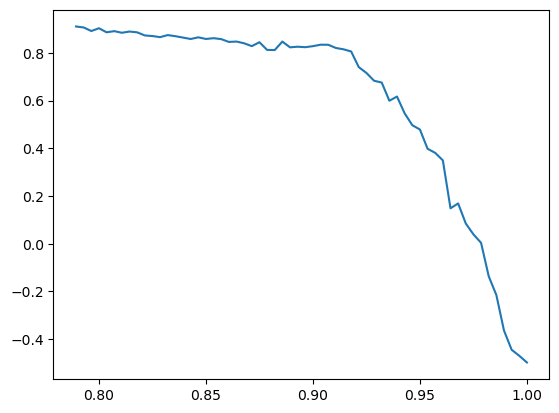

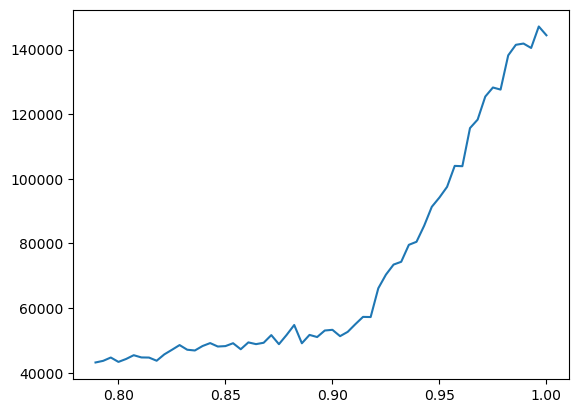

Training size: 511030
Test size: 105748
Test ratio = 0.17
R_squared of train =  0.964764914998004
R_squared of test =  0.5779326880773981
 Test R squared by month=  [0.8961727732965669, 0.8909227607871739, 0.8968248875651591, 0.8964449741691227, 0.8903795367042007, 0.8858405038005335, 0.8937105207677837, 0.8905715788907924, 0.8915036735825036, 0.88854131278461, 0.8799416933606274, 0.8820785360187434, 0.8730995662184269, 0.8645237335917054, 0.8767119908728358, 0.8594443383000144, 0.8590473626521333, 0.8810683485505346, 0.8669803967592133, 0.8621411765184553, 0.8623914344987353, 0.8555608883694773, 0.8603527081199752, 0.8581840009993409, 0.8395361371199401, 0.8407121125178352, 0.831822930233795, 0.7685304367602138, 0.7411790029083194, 0.7159386361668449, 0.7000915449608474, 0.6231724298579817, 0.6367198665205716, 0.5685795539007822, 0.514170945362662, 0.49409378794298076, 0.40760357957297744, 0.39859009897604414, 0.3561810929335445, 0.2019652028812018, 0.21117165749709965, 0.142400205966

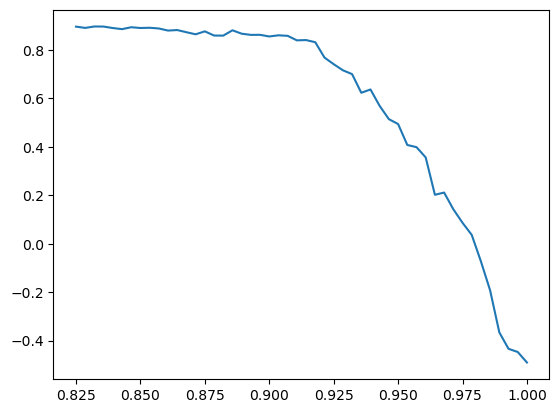

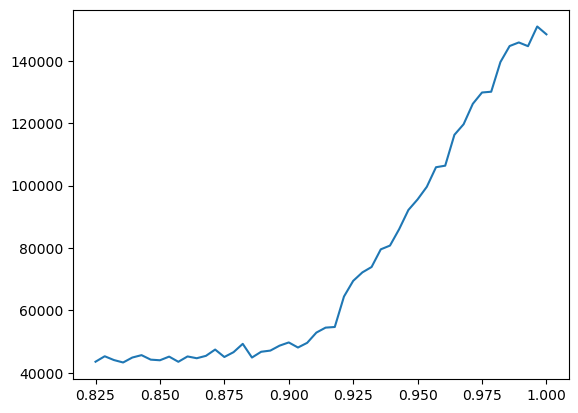

Training size: 529458
Test size: 87320
Test ratio = 0.14
R_squared of train =  0.9643981113920391
R_squared of test =  0.5877192330192043
 Test R squared by month=  [0.9143756587853644, 0.9146606321880321, 0.9071163307081904, 0.8986078098721655, 0.9059833385691854, 0.9012484125658612, 0.8874799853583341, 0.9120597707482149, 0.9017241524420145, 0.8979806061880307, 0.8981196348997936, 0.8939880296483115, 0.897375405071473, 0.893967482935059, 0.881274643459498, 0.8805535622944021, 0.8756069262763598, 0.8267194692572196, 0.80609673842074, 0.7708727295284179, 0.7593439241283217, 0.7019104197194583, 0.7108762761709214, 0.6525190440079205, 0.6050004592243112, 0.5902012777976735, 0.5055734259458716, 0.49570531221330627, 0.4601832950307425, 0.3155721130895228, 0.33508566899327574, 0.2665384361326544, 0.21544387772741525, 0.15993642104124217, 0.08643692590896779, -0.022370417695351197, -0.1758161600199788, -0.23147769391753958, -0.2599691346716322, -0.3106992021610857]


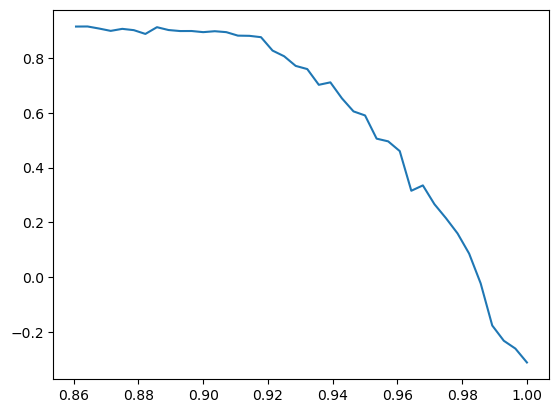

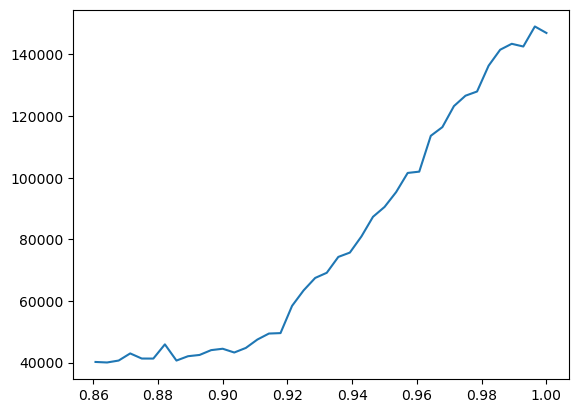

Training size: 546832
Test size: 69946
Test ratio = 0.11
R_squared of train =  0.9630935109488198
R_squared of test =  0.5574940651594392
 Test R squared by month=  [0.9213897861705577, 0.911604225321744, 0.9133597457180953, 0.9110294433756126, 0.8996559594275606, 0.9024457769203614, 0.8974237370365257, 0.8524411565717219, 0.8354106131750882, 0.8041691554795478, 0.7931121243436374, 0.7474742403296777, 0.7527108281343792, 0.7017742094581576, 0.6604317737778451, 0.6391896998223499, 0.5538679025939419, 0.5553995390948991, 0.5173002492211973, 0.38791954809603457, 0.3944049801499514, 0.3340378006475052, 0.25946966504223157, 0.21012919642402028, 0.13661894541686126, 0.02163188979798336, -0.13107441467831027, -0.16743941653213934, -0.20161289052765907, -0.25315990849982617]


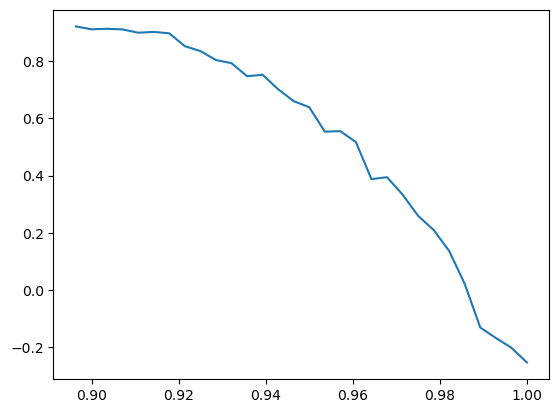

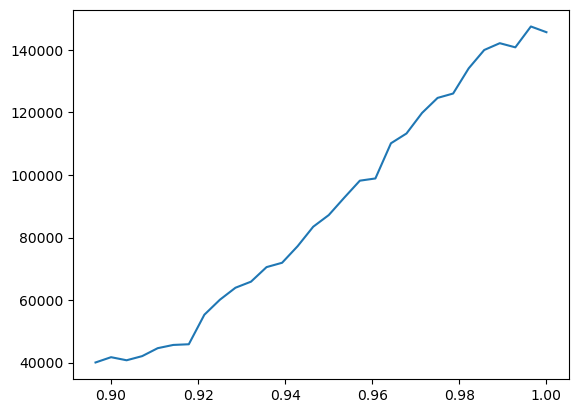

Training size: 570235
Test size: 46543
Test ratio = 0.08
R_squared of train =  0.9640581866822178
R_squared of test =  0.7085288656558006
 Test R squared by month=  [0.9297287876470751, 0.9230775845299984, 0.9281058163760002, 0.9111087030448491, 0.8988927057098045, 0.8820019644384535, 0.8555987885374614, 0.8494786788754409, 0.828974842785233, 0.6925633820495705, 0.6862160808365969, 0.6514787407104136, 0.620338934469072, 0.5883329233615575, 0.5469560903366404, 0.4774467053890118, 0.4025010113737252, 0.36300559710958014, 0.3391204024067721, 0.30958075792338713]


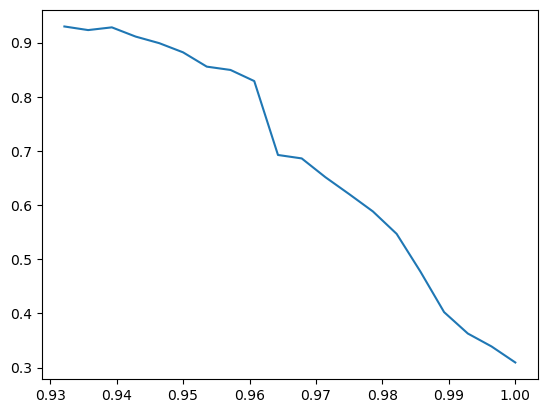

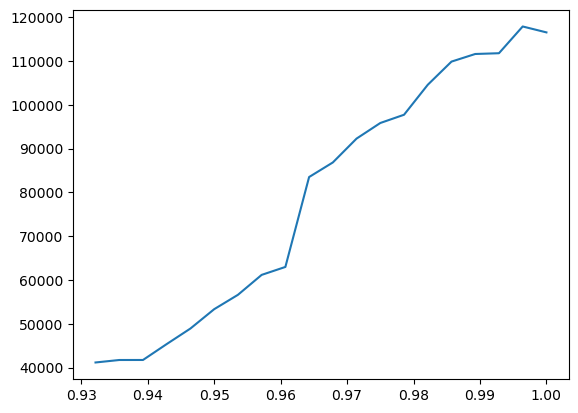

Training size: 594497
Test size: 22281
Test ratio = 0.04
R_squared of train =  0.9636303555477368
R_squared of test =  0.8920470797862289
 Test R squared by month=  [0.9351808191822688, 0.9317896201739428, 0.9180636411855538, 0.9097814968315208, 0.9015222373287033, 0.8817295850620372, 0.8686036516327591, 0.8624110723961065, 0.8437610864530406, 0.8347333713987037]


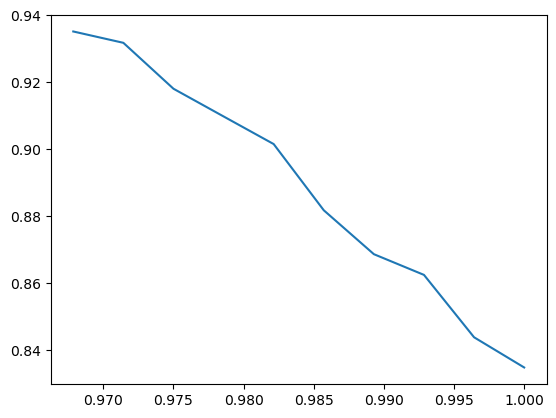

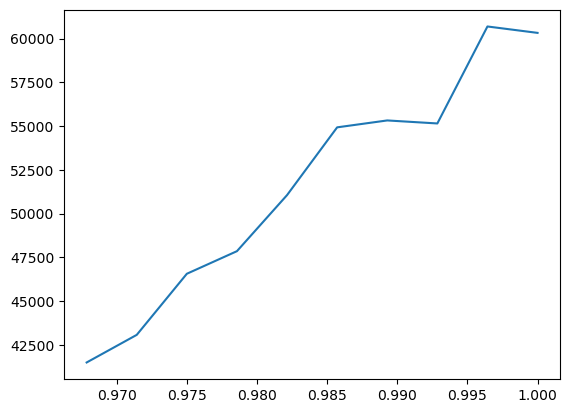

In [34]:
month_threshold_list = [0.7892857142857143, 0.825, 0.8607142857142858, 0.8964285714285715, 0.9321428571428572, 0.9678571428571427]
iteration = 0
for month_threshold in month_threshold_list:
    iteration = iteration + 1
    train_data = new_data[(new_data['month_count']<month_threshold)]
    test_data = new_data[(new_data['month_count']>=month_threshold)]

    print('Training size:', len(train_data))
    print('Test size:', len(test_data))
    print('Test ratio = %.2f' % (len(test_data)/len(new_data)))
    x_train = train_data[train_data.columns.difference(['resale_price'])]
    y_train = train_data['resale_price']
    x_test = test_data[test_data.columns.difference(['resale_price'])]
    y_test = test_data['resale_price'] 
    
    gb_model = ensemble.GradientBoostingRegressor(n_estimators = 500, random_state = 2023)   

    # Fit model:
    gb_model.fit(x_train, y_train)
    y_train_pred = gb_model.predict(x_train)
    y_test_pred = gb_model.predict(x_test)

    print("R_squared of train = ", metrics.r2_score(y_train, y_train_pred))
    print("R_squared of test = ", metrics.r2_score(y_test_pred, y_test))
    month_list = x_test['month_count'].unique()
    r_2_month = []
    rmse_month = []
    
    # Plotting:
    for curr_month in month_list:
        y_test_pred_month = y_test_pred[x_test['month_count'] == curr_month]
        y_test_month = y_test[x_test['month_count'] == curr_month]
        r_2_test = metrics.r2_score(y_test_pred_month, y_test_month)
        rmse_test = (metrics.mean_squared_error(y_test_pred_month, y_test_month))**(0.5)
        r_2_month.append(r_2_test)
        rmse_month.append(rmse_test)

    print(' Test R squared by month= ', r_2_month)

    #Checking with plot:
    fig = plt.figure()
    plt.plot(month_list, r_2_month)
    plt.show()
    plt.plot(month_list, rmse_month)
    plt.show()

    df = pd.DataFrame()
    df['month'] = month_list
    df['rmse'] = rmse_month
    df['r_squared'] = r_2_month
    path = r'/Users/vince.dang/Desktop/SMU_MITB/CS610 Applied Machine Learning/Project/house_price/'
    file_name = path + 'r2_rmse' + str(iteration) + '.csv'
    df.to_csv(file_name, encoding='utf-8', index=False)

In [26]:
path = r'/Users/vince.dang/Desktop/SMU_MITB/CS610 Applied Machine Learning/Project/house_price/'
file_name = path + 'r2_rmse1'+'.csv'
r2_rmse = pd.read_csv(file_name)
df_r2 = r2_rmse[['month', 'r_squared']]
df_rmse = r2_rmse[['month', 'rmse']]
for i in range(2,7):
    path = r'/Users/vince.dang/Desktop/SMU_MITB/CS610 Applied Machine Learning/Project/house_price/'
    file_name = path + 'r2_rmse' + str(i) + '.csv'
    r2_rmse = pd.read_csv(file_name)
    df_r2 = pd.merge(df_r2, r2_rmse[['month', 'r_squared']], how="left", on=['month'])
    df_rmse = pd.merge(df_rmse, r2_rmse[['month', 'rmse']], how="left", on=['month'])

df_r2

/var/folders/wh/cryj0l213016gqtxpq5trpxc0000gn/T/ipykernel_89404/2764585944.py:10: FutureWarning: Passing 'suffixes' which cause duplicate columns {'r_squared_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_r2 = pd.merge(df_r2, r2_rmse[['month', 'r_squared']], how="left", on=['month'])
/var/folders/wh/cryj0l213016gqtxpq5trpxc0000gn/T/ipykernel_89404/2764585944.py:11: FutureWarning: Passing 'suffixes' which cause duplicate columns {'rmse_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_rmse = pd.merge(df_rmse, r2_rmse[['month', 'rmse']], how="left", on=['month'])
/var/folders/wh/cryj0l213016gqtxpq5trpxc0000gn/T/ipykernel_89404/2764585944.py:10: FutureWarning: Passing 'suffixes' which cause duplicate columns {'r_squared_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_r2 = pd.merge(df_r2, r2_rmse[['month', 'r_squared']], how="left", on=['month'])
/var/folders/wh/cryj0l213016gqt

,month,r_squared_x,r_squared_y,r_squared_x,r_squared_y,r_squared_x,r_squared_y
0,0.910641,0.910641,NaN,NaN,NaN,NaN,NaN
1,0.906483,0.906483,NaN,NaN,NaN,NaN,NaN
2,0.891607,0.891607,NaN,NaN,NaN,NaN,NaN
3,0.903225,0.903225,NaN,NaN,NaN,NaN,NaN
4,0.886246,0.886246,NaN,NaN,NaN,NaN,NaN
5,0.891080,0.891080,NaN,NaN,NaN,NaN,NaN
6,0.884322,0.884322,NaN,NaN,NaN,NaN,NaN
7,0.889374,0.889374,NaN,NaN,NaN,NaN,NaN
8,0.886099,0.886099,NaN,NaN,NaN,NaN,NaN
9,0.873031,0.873031,NaN,NaN,NaN,NaN,NaN


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

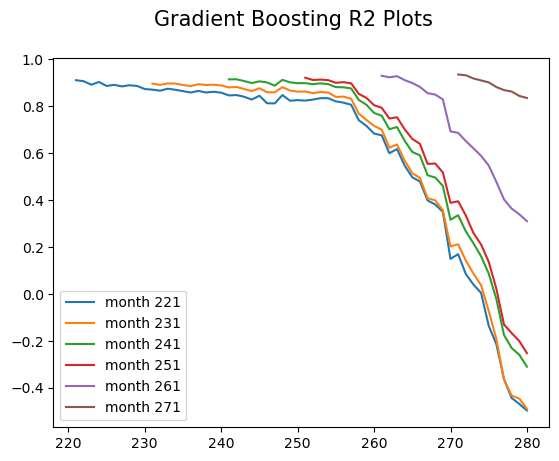

In [70]:
# for i in range(1,7):
path = r'/Users/vince.dang/Desktop/SMU_MITB/CS610 Applied Machine Learning/Project/house_price/'
fig = plt.figure()
datasets = []
for i in range(1,7):
    file_name = path + 'r2_rmse' + str(i) + '.csv'
    fig = plt.figure()
    datasets.append(pd.read_csv(file_name))
    
plt.plot([i for i in range(221, 281)], datasets[0]['r_squared'], label = "month 221")
plt.plot([i for i in range(231, 281)], datasets[1]['r_squared'], label = "month 231")
plt.plot([i for i in range(241, 281)], datasets[2]['r_squared'], label = "month 241")
plt.plot([i for i in range(251, 281)], datasets[3]['r_squared'], label = "month 251")
plt.plot([i for i in range(261, 281)], datasets[4]['r_squared'], label = "month 261")
plt.plot([i for i in range(271, 281)], datasets[5]['r_squared'], label = "month 271")
plt.legend()
fig.suptitle("Gradient Boosting R2 Plots", fontsize = 15)
plt.show()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

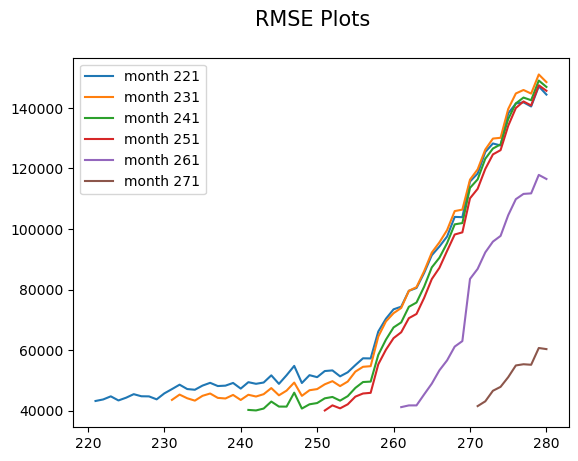

In [53]:
# for i in range(1,7):
path = r'/Users/vince.dang/Desktop/SMU_MITB/CS610 Applied Machine Learning/Project/house_price/'
fig = plt.figure()
datasets = []
for i in range(1,7):
    file_name = path + 'r2_rmse' + str(i) + '.csv'
    fig = plt.figure()
    datasets.append(pd.read_csv(file_name))
    
plt.plot([i for i in range(221, 281)], datasets[0]['rmse'], label = "month 221")
plt.plot([i for i in range(231, 281)], datasets[1]['rmse'], label = "month 231")
plt.plot([i for i in range(241, 281)], datasets[2]['rmse'], label = "month 241")
plt.plot([i for i in range(251, 281)], datasets[3]['rmse'], label = "month 251")
plt.plot([i for i in range(261, 281)], datasets[4]['rmse'], label = "month 261")
plt.plot([i for i in range(271, 281)], datasets[5]['rmse'], label = "month 271")
plt.legend()
fig.suptitle("RMSE Plots", fontsize = 15)
plt.show()

### Model without COVID data:

Training size: 433057
Test size: 102070
Test ratio = 0.17
R_squared of train =  0.967307495638841
R_squared of test =  0.7767782278008925
 Test R squared by month=  [0.8876485323529816, 0.8958192267666992, 0.8809261560289522, 0.8649708632553627, 0.8861319321495901, 0.8626749082124965, 0.879053545126331, 0.8814353159879813, 0.8792440781473113, 0.8571801468283633, 0.8606212001254866, 0.8632513521479755, 0.8618417254874513, 0.8454986079342897, 0.8441913905305659, 0.8421194763622928, 0.8429203873330873, 0.8521462413703018, 0.8335310659543581, 0.837989004798334, 0.8119783113293343, 0.8205514472539877, 0.8209914395958675, 0.8223171647918984, 0.8134421353713244, 0.8123589624430121, 0.8133896323885698, 0.809176313542613, 0.7890246860748785, 0.8045941717304151, 0.7951507817435627, 0.7925446269252371, 0.8078861941871944, 0.7971952013442638, 0.761287939976174, 0.7661028468515142, 0.775600602276481, 0.7471894349988197, 0.757019726392846, 0.7294939477669649, 0.7325870572505054, 0.7122419417401914, 

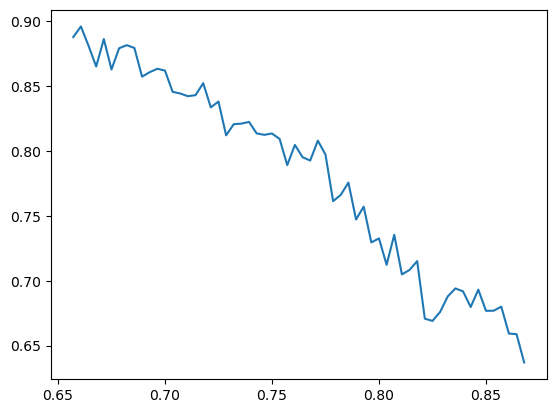

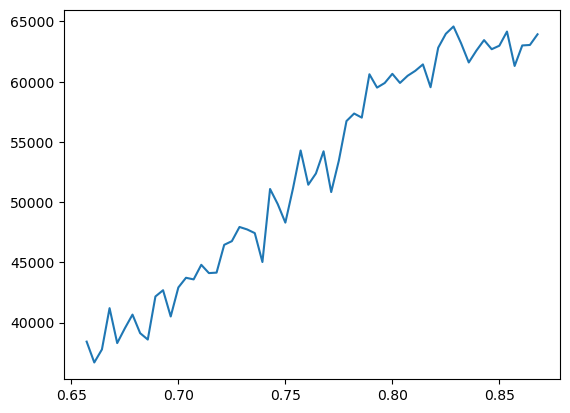

In [69]:
#  Model using 2014 - 2019 split:

train_data = new_data[(new_data['month_count']<0.657142857142857)]
test_data = new_data[(new_data['month_count']>=0.657142857142857) & 
                     (new_data['month_count']<0.871428571428571)]


print('Training size:', len(train_data))
print('Test size:', len(test_data))
print('Test ratio = %.2f' % (len(test_data)/len(new_data)))
x_train = train_data[train_data.columns.difference(['resale_price'])]
y_train = train_data['resale_price']
x_test = test_data[test_data.columns.difference(['resale_price'])]
y_test = test_data['resale_price']

gb_model = ensemble.GradientBoostingRegressor(n_estimators = 500, random_state = 2023)   

# Fit model:
gb_model.fit(x_train, y_train)
y_train_pred = gb_model.predict(x_train)
y_test_pred = gb_model.predict(x_test)

print("R_squared of train = ", metrics.r2_score(y_train, y_train_pred))
print("R_squared of test = ", metrics.r2_score(y_test_pred, y_test))
month_list = x_test['month_count'].unique()
r_2_month = []
rmse_month = []

# Plotting:
for curr_month in month_list:
    y_test_pred_month = y_test_pred[x_test['month_count'] == curr_month]
    y_test_month = y_test[x_test['month_count'] == curr_month]
    r_2_test = metrics.r2_score(y_test_pred_month, y_test_month)
    rmse_test = (metrics.mean_squared_error(y_test_pred_month, y_test_month))**(0.5)
    r_2_month.append(r_2_test)
    rmse_month.append(rmse_test)

print(' Test R squared by month= ', r_2_month)

#Checking with plot:
fig = plt.figure()
plt.plot(month_list, r_2_month)
plt.show()
plt.plot(month_list, rmse_month)
plt.show()

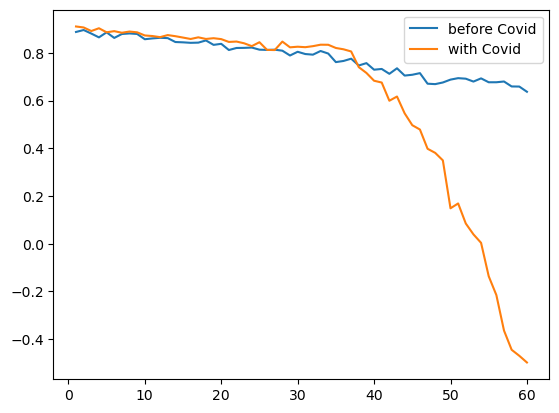

In [64]:
plt.plot([i for i in range (1,61)], r_2_month, label = "before Covid" )
plt.plot([i for i in range(1, 61)], datasets[0]['r_squared'], label = "with Covid")
plt.legend()

In [67]:
df = pd.DataFrame()
df['month'] = month_list
df['rmse'] = rmse_month
df['r_squared'] = r_2_month
path = r'/Users/vince.dang/Desktop/SMU_MITB/CS610 Applied Machine Learning/Project/house_price/'
file_name = path + 'r2_rmse_beforeCovid' + '.csv'
df.to_csv(file_name)